# geopandasの基本（１）
- geopandasの使い方をマスターしよう　～Shapeファイルの読込・作成、GeoDataFrameの扱い方まで～
- https://www.gis-py.com/entry/geopandas-master

In [1]:
# geopandasをインポート
import geopandas as gpd
from matplotlib import pyplot as plt

In [2]:
# Jupyter Notebookでノートブック上にグラフを描画する際に指定する記述
%matplotlib inline

## shapeファイルの読み込み

In [3]:
# esriの全国市区町村界データを読み込む
# https://www.esrij.com/products/japan-shp/
fp = r"C:\Users\0000420837\Desktop\GeoPandas_Test\data\japan_ver81\japan_ver81.shp"

In [4]:
# Shapeをファイル読込
# encodingで"SHIFT-JIS"を指定
data = gpd.read_file(fp, encoding="SHIFT-JIS")

In [5]:
# データ型を確認
type(data)

geopandas.geodataframe.GeoDataFrame

In [6]:
# GeoDataFrameの最初の5行を取得
data.tail()

,JCODE,KEN,SICHO,GUN,SEIREI,SIKUCHOSON,CITY_ENG,P_NUM,H_NUM,geometry
1905,47362,沖縄県,None,島尻郡,None,八重瀬町,Yaese-cho,30093,11268,"POLYGON ((127.71732 26.17937, 127.72088 26.175..."
1906,47375,沖縄県,None,宮古郡,None,多良間村,Tarama-son,1192,525,"MULTIPOLYGON (((124.70554 24.67708, 124.70436 ..."
1907,47381,沖縄県,None,八重山郡,None,竹富町,Taketomi-cho,4239,2360,"MULTIPOLYGON (((123.76601 24.06841, 123.76380 ..."
1908,47382,沖縄県,None,八重山郡,None,与那国町,Yonaguni-cho,1490,786,"MULTIPOLYGON (((123.03378 24.45399, 123.03443 ..."
1909,None,沖縄県,None,None,None,所属未定地,None,0,0,"POLYGON ((127.84623 26.43518, 127.84373 26.431..."


In [7]:
# カラム指定してデータを取得
data['geometry'].head()

0    POLYGON ((141.33504 43.06914, 141.34233 43.066...
1    POLYGON ((141.39820 43.17340, 141.40002 43.171...
2    POLYGON ((141.44721 43.15611, 141.44698 43.155...
3    POLYGON ((141.47346 43.09610, 141.44938 43.062...
4    POLYGON ((141.36635 43.05805, 141.38471 43.046...
Name: geometry, dtype: geometry

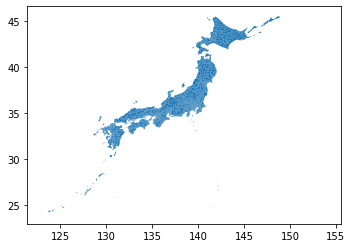

In [8]:
# .plot() を使用することで読み込んだShapeを視覚化
data.plot();

In [9]:
# 座標系などを確認
data.crs

{'init': 'epsg:4612'}

## shapeファイルの作成
- 日本地図の都道府県別のレコードを別のShapeファイルとして作成

### ★抽出する都道府県を変数に指定

In [10]:
# 抽出する都道府県を変数に指定
region = "Aomori"
ken = "青森県"

In [11]:
region

'Aomori'

In [12]:
# 保存先のファイルを作成
out = r"C:\Users\0000420837\Desktop\GeoPandas_Test\data\japan_ver81\japan_ver81_" + region + ".shp"

In [13]:
out

'C:\\Users\\0000420837\\Desktop\\GeoPandas_Test\\data\\japan_ver81\\japan_ver81_Aomori.shp'

In [14]:
# KENで都道府県を抽出
selection = data[data.KEN == ken]

In [15]:
selection.head()

,JCODE,KEN,SICHO,GUN,SEIREI,SIKUCHOSON,CITY_ENG,P_NUM,H_NUM,geometry
194,02201,青森県,None,None,None,青森市,Aomori-shi,293066,136713,"MULTIPOLYGON (((140.70208 40.85484, 140.70376 ..."
195,02202,青森県,None,None,None,弘前市,Hirosaki-shi,177189,79404,"POLYGON ((140.33292 40.76140, 140.33571 40.759..."
196,02203,青森県,None,None,None,八戸市,Hachinohe-shi,235878,106907,"MULTIPOLYGON (((141.63276 40.49563, 141.63200 ..."
197,02204,青森県,None,None,None,黒石市,Kuroishi-shi,35002,13603,"POLYGON ((140.61295 40.68839, 140.61817 40.687..."
198,02205,青森県,None,None,None,五所川原市,Goshogawara-shi,57310,25366,"MULTIPOLYGON (((140.53278 40.98834, 140.53967 ..."


In [16]:
# .to_file()でShapeファイルの作成
selection.to_file(out)

In [17]:
# 作成した都道府県のShapeを視覚化
fp_Hokkaido = r"C:\Users\0000420837\Desktop\GeoPandas_Test\data\japan_ver81\japan_ver81_" + region + ".shp"

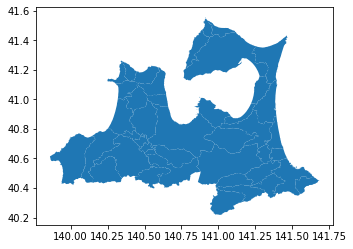

In [18]:
data_Hokkaido = gpd.read_file(fp_Hokkaido)
data_Hokkaido.plot();